In [92]:
#Total sample size N = 4000; 3000 with Y=0 and 1000 with Y=1. Y is the target variable.
#There are three clinical variables, X1, X2 and X3. Every Xi is dichotomous ({0,1}).
#Determine a fraction vector for 16 combinatorial stata.fro
#Generate N samples' data records for Y and X1, X2 and X3.

#Generate Y
import numpy as np
N = 4000
N_Y_1 = 1000
N_Y_0 = N - N_Y_1
Y = np.zeros(N)
Y[0:N_Y_1] = 1

#Determine a fraction vector
X123_pattern = [[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]]
fv_0 = np.random.dirichlet(np.ones(8), size=1)[0,:] #X1,X2,X3 combination ration in the case of Y=0
print(fv_0)
fv_1 = np.random.dirichlet(np.ones(8), size=1)[0,:] #X1,X2,X3 combination ration in the case of Y=1
print(fv_1)

#The num of samples of each pattern
pt_Y0 = np.random.multinomial(N_Y_0,fv_0,1)[0,:]
pt_Y1 = np.random.multinomial(N_Y_1,fv_1,1)[0,:]
print(pt_Y0)
print(pt_Y1)

[0.05394638 0.02123961 0.1193196  0.02845993 0.35459267 0.17094611
 0.05064883 0.20084686]
[0.31095921 0.13669196 0.03618093 0.082849   0.16263281 0.21542418
 0.04616758 0.00909432]
[ 163   68  356   80 1052  496  157  628]
[301 130  34  87 166 221  51  10]


In [93]:
#Generate X1,X2,X3
data_Y0 = np.empty([N_Y_0,3])
data_Y1 = np.empty([N_Y_1,3])
idx_Y0 = 0
idx_Y1 = 0
for i in range(8):
    data_Y0[idx_Y0:(idx_Y0+pt_Y0[i]),:] = np.array(X123_pattern[i])
    data_Y1[idx_Y1:(idx_Y1+pt_Y1[i]),:] = np.array(X123_pattern[i])
    idx_Y0 = idx_Y0 + pt_Y0[i]
    idx_Y1 = idx_Y1 + pt_Y1[i]
    #print(data_Y1,"\n")

data = np.r_[data_Y1,data_Y0]
#data

In [97]:
#Dicision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data, Y)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

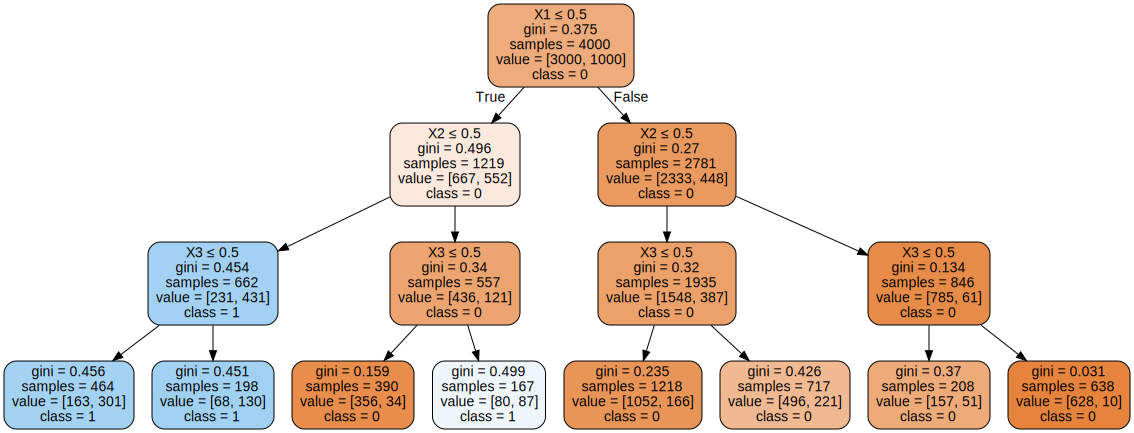

In [99]:
#Visualization
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=["X1","X2","X3"],  
                         class_names=["0","1"],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data) 
graph

In [100]:
#Correspondense with below
print(pt_Y0)
print(pt_Y1)

[ 163   68  356   80 1052  496  157  628]
[301 130  34  87 166 221  51  10]
